## Análise Exploratória de Dados

#### 1 - Importando os dados

Link do Dataset: [Jobs and Salaries in Data field 2024](https://www.kaggle.com/datasets/murilozangari/jobs-and-salaries-in-data-field-2024)

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
plt.style.use('bmh')
pd.set_option('display.max_columns', 39)

In [64]:
url = 'https://raw.githubusercontent.com/ryanrodr/eda-jobs-in-data/main/dados/jobs_in_data_2024.csv'
df = pd.read_csv(url)

In [65]:
print(f'{df.shape[0]} linhas e {df.shape[1]} colunas')

14199 linhas e 12 colunas


In [66]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'work_setting', 'company_location', 'company_size', 'job_category'],
      dtype='object')

#### 2 - Limpeza e preparação dos dados

- Identificando valores ausentes NaN (Not a Number).

In [67]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
dtype: int64

In [68]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization


- Removendo colunas que não vão ser utilizadas

In [69]:
df.drop(columns=['salary_currency', 'salary', 'employee_residence', 'company_location'], inplace=True)

- Convertendo o tipo de dado das colunas

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         14199 non-null  int64 
 1   experience_level  14199 non-null  object
 2   employment_type   14199 non-null  object
 3   job_title         14199 non-null  object
 4   salary_in_usd     14199 non-null  int64 
 5   work_setting      14199 non-null  object
 6   company_size      14199 non-null  object
 7   job_category      14199 non-null  object
dtypes: int64(2), object(6)
memory usage: 887.6+ KB


- Identificando as colunas categóricas que contenham menos de 10 valores únicos e contenham o tipo de dado 'object'

In [71]:
limite = 10

colunas_categoricas = [col for col in df.columns if df[col].nunique() <= limite and df[col].dtype == 'object']

In [72]:
colunas_categoricas

['experience_level',
 'employment_type',
 'work_setting',
 'company_size',
 'job_category']

- Alterando o tipo de dado para 'category'

In [73]:
df[colunas_categoricas] = df[colunas_categoricas].astype('category')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   work_year         14199 non-null  int64   
 1   experience_level  14199 non-null  category
 2   employment_type   14199 non-null  category
 3   job_title         14199 non-null  object  
 4   salary_in_usd     14199 non-null  int64   
 5   work_setting      14199 non-null  category
 6   company_size      14199 non-null  category
 7   job_category      14199 non-null  category
dtypes: category(5), int64(2), object(1)
memory usage: 403.3+ KB


#### 3 - Resumindo os dados com uma Tabela de Frequência

In [75]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary_in_usd,work_setting,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,Remote,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,In-person,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,In-person,M,BI and Visualization


- Criando uma Tabela de Frequência da contagem de cada Categoria

In [76]:
# Contando a frequência dos valores com value_counts()
frequencia = df['job_category'].value_counts()

# Contando a frequência e transformando em %
frequencia_relativa = df['job_category'].value_counts(normalize=True) * 100

print(f'{frequencia}\n\n{frequencia_relativa}')

job_category
Data Science and Research         4675
Data Engineering                  3157
Data Analysis                     2204
Machine Learning and AI           2148
Leadership and Management          791
BI and Visualization               600
Data Architecture and Modeling     419
Data Management and Strategy       115
Data Quality and Operations         79
Cloud and Database                  11
Name: count, dtype: int64

job_category
Data Science and Research         32.924854
Data Engineering                  22.233960
Data Analysis                     15.522220
Machine Learning and AI           15.127826
Leadership and Management          5.570815
BI and Visualization               4.225650
Data Architecture and Modeling     2.950912
Data Management and Strategy       0.809916
Data Quality and Operations        0.556377
Cloud and Database                 0.077470
Name: proportion, dtype: float64


In [77]:
# Criando um DataFrame com as variáveis
tabela_categoria = pd.DataFrame({'Frequência': frequencia,
                                 'Frequência Relativa (%)': frequencia_relativa})

In [78]:
# Calculando a soma acumulada com a medida de frequência
tabela_categoria['Frequência Acumulada'] = tabela_categoria['Frequência'].cumsum()

# Calculando a frequência relativa acumulada
tabela_categoria['Frequência Relativa Acumulada (%)'] = (tabela_categoria['Frequência Acumulada'] /
                                                         tabela_categoria['Frequência'].sum()) * 100

In [79]:
tabela_categoria.rename_axis('Categoria', inplace=True)

tabela_categoria.reset_index(inplace=True)

# Centralizando a visualização da tabela
tabela_categoria.style.set_properties(**{'text-align': 'center'})

,Categoria,Frequência,Frequência Relativa (%),Frequência Acumulada,Frequência Relativa Acumulada (%)
0,Data Science and Research,4675,32.924854,4675,32.924854
1,Data Engineering,3157,22.233960,7832,55.158814
2,Data Analysis,2204,15.522220,10036,70.681034
3,Machine Learning and AI,2148,15.127826,12184,85.808860
4,Leadership and Management,791,5.570815,12975,91.379675
5,BI and Visualization,600,4.225650,13575,95.605324
6,Data Architecture and Modeling,419,2.950912,13994,98.556236
7,Data Management and Strategy,115,0.809916,14109,99.366153
8,Data Quality and Operations,79,0.556377,14188,99.922530
9,Cloud and Database,11,0.077470,14199,100.000000


- Distribuição de Pareto para visualizar os dados da Tabela de Frequência 

In [80]:
# Para melhorar a visualização do nome de cada Categoria
tabela_categoria['Categoria'] = tabela_categoria['Categoria'].str.replace(' and ', '\n')

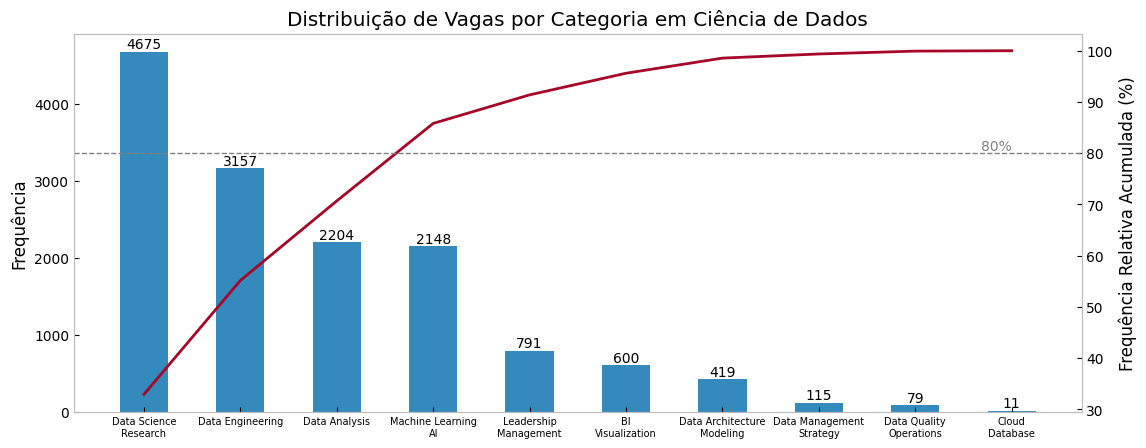

In [81]:
# Criar figura e eixos
fig, ax1 = plt.subplots(figsize=(13, 6))

# Gráfico de barras
bars = ax1.bar(tabela_categoria['Categoria'],
               tabela_categoria['Frequência'],
               color='C0',
               width=0.50)

# Adicionar rótulos de dados às barras
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height),
             ha='center', va='bottom')

# Eixo y secundário para a linha
ax2 = ax1.twinx()

# Adicionar a linha de Frequência %
ax2.plot(tabela_categoria['Categoria'],
         tabela_categoria['Frequência Relativa Acumulada (%)'],
         color='C1',
         label='Frequência Relativa Acumulada (%)')

# Adicionar linha de 80%
ax2.axhline(y=80, color='gray', linestyle='--', lw=1)
ax2.text(len(tabela_categoria)-1, 80, '80%', color='gray', va='bottom', ha='right')
ax2.tick_params(axis='y')

# Rótulos e título
ax1.set_xlabel('')
ax1.set_ylabel('Frequência')
ax2.set_ylabel('Frequência Relativa Acumulada (%)')
plt.title('Distribuição de Vagas por Categoria em Ciência de Dados')

# Definir os valores dos ticks do eixo X
ax1.set_xticks(range(len(tabela_categoria['Categoria'])))

# Definir os rótulos dos ticks do eixo X
ax1.set_xticklabels(tabela_categoria['Categoria'], fontsize=7, ha='center')

# Ajustar o espaçamento dos rótulos do eixo x
plt.subplots_adjust(bottom=0.25)

# Remover fundo e linhas de grade
ax1.set_facecolor('none')
ax1.grid(False)
ax2.grid(False)

# Exibir o gráfico
plt.show()

- Criando uma tabela de distribuição de frequências com categoria e ano

In [82]:
# crosstab para criar uma tabela cruzada com duas variáveis
tabela_dist = pd.crosstab(index= df['job_category'],
                          columns= df['work_year'],
                          aggfunc= 'count',
                          values= df['job_category'])

# Renomeando o eixo das linhas e das colunas da tabela
tabela_dist = tabela_dist.rename_axis('Categoria').rename_axis('Ano de Pesquisa', axis='columns')

# Adicionando uma coluna com os valores Totais de cada categoria
tabela_dist['Total'] = tabela_dist.sum(axis=1)

# Ordenando os dados com base na coluna Total
tabela_dist.sort_values(by='Total', ascending=False, inplace=True)

In [83]:
# Centralizando a visualização da tabela
tabela_dist.style.set_properties(**{'text-align': 'center'})

Ano de Pesquisa,2020,2021,2022,2023,2024,Total
Categoria,,,,,,
Data Science and Research,29,72,500,2754,1320,4675
Data Engineering,17,45,499,1891,705,3157
Data Analysis,15,28,290,1301,570,2204
Machine Learning and AI,10,37,186,1346,569,2148
Leadership and Management,0,9,80,464,238,791
BI and Visualization,0,0,8,371,221,600
Data Architecture and Modeling,0,5,46,252,116,419
Data Management and Strategy,0,1,12,58,44,115
Data Quality and Operations,0,0,12,45,22,79


- Criando uma visualização da quantidade de vagas por nível de experiência

In [84]:
# Contando a frequência dos valores com value_counts()
quantidade_exp = df['experience_level'].value_counts()

# Contando a frequência e transformando em %
percentual_exp = df['experience_level'].value_counts(normalize=True) * 100

tabela_exp = pd.DataFrame({'Quantidade': quantidade_exp,
                           'Porcentagem (%)': percentual_exp})

tabela_exp = tabela_exp.reset_index().rename(columns={'experience_level': 'Experiência'})

In [85]:
# Centralizando a visualização da tabela
tabela_exp.style.set_properties(**{'text-align': 'center'})

,Experiência,Quantidade,Porcentagem (%)
0,Senior,9381,66.068033
1,Mid-level,3339,23.515741
2,Entry-level,1063,7.486443
3,Executive,416,2.929784


#### 4 - Explorando visualizações com matplotlib e seaborn

- Criando uma visualização com subplots da biblioteca matplotlib.

In [86]:
tabela_categoria['Categoria'] = tabela_categoria['Categoria'].str.replace('\n', ' and ')

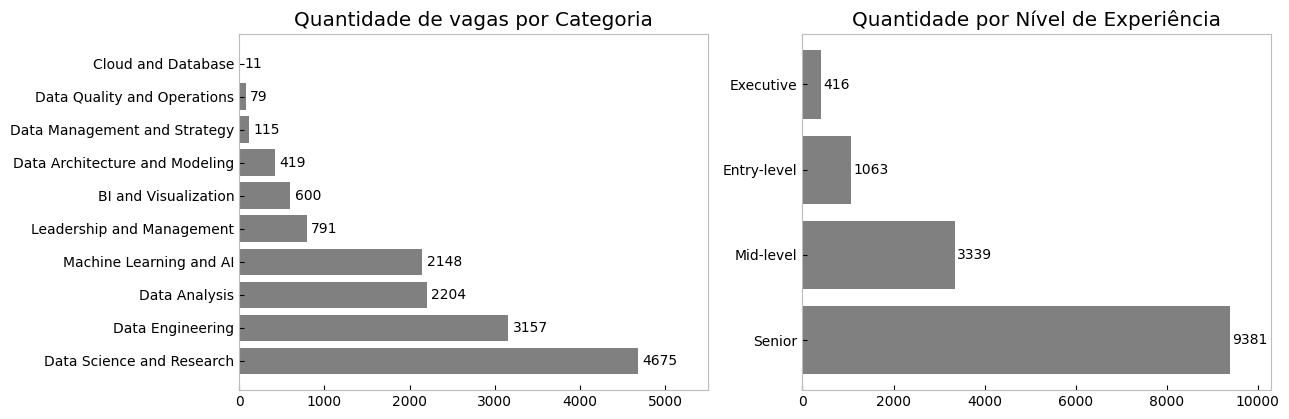

In [87]:
# Definindo o tamanho da imagem
plt.figure(figsize=(13, 8))

# Criando um gráfico de barras horizontais para Categorias
ax1 = plt.subplot(2, 2, 1)
bars1 = plt.barh(tabela_categoria['Categoria'], tabela_categoria['Frequência'], color='gray')
for i, quantidade in enumerate(tabela_categoria['Frequência']):
    plt.text(quantidade + 50, i, str(quantidade), va='center')
plt.title('Quantidade de vagas por Categoria')
plt.xlim(0, 5500)

# Criando um gráfico de barras horizontais para Experiência
ax2 = plt.subplot(2, 2, 2)
bars2 = plt.barh(tabela_exp['Experiência'], tabela_exp['Quantidade'], color='gray')
for i, quantidade in enumerate(tabela_exp['Quantidade']):
    plt.text(quantidade + 50, i, str(quantidade), va='center')
plt.title('Quantidade por Nível de Experiência')
plt.xlim(0, 10300)

# Remover fundo e linhas de grade
ax1.grid(False)
ax2.grid(False)
ax1.set_facecolor('none')
ax2.set_facecolor('none')

# Ajustando o tamanho
plt.tight_layout()

# Exibir o gráfico
plt.show()

- Criando uma tabela de distribuição de frequências com categoria e nível de experiência

In [88]:
# Tabela de distribuição cruzada usando crosstab
tabela_dist_exp = pd.crosstab(index=df['job_category'],
                 columns=df['experience_level'],
                 aggfunc='count',
                 values=df['job_category'])

tabela_dist_exp['Total'] = tabela_dist_exp.sum(axis=1)

tabela_dist_exp = tabela_dist_exp.sort_values(by='Total', ascending=False)

tabela_dist_exp = tabela_dist_exp.rename_axis('Categoria').rename_axis('Experiência', axis='columns')

In [89]:
# Visualizando a tabela em um HeatMap
tabela_dist_exp.style.background_gradient(cmap='binary')

Experiência,Entry-level,Executive,Mid-level,Senior,Total
Categoria,,,,,
Data Science and Research,296,124,1049,3206,4675
Data Engineering,128,140,803,2086,3157
Data Analysis,441,24,554,1185,2204
Machine Learning and AI,92,33,385,1638,2148
Leadership and Management,23,71,245,452,791
BI and Visualization,49,20,171,360,600
Data Architecture and Modeling,0,4,44,371,419
Data Management and Strategy,21,0,62,32,115
Data Quality and Operations,13,0,22,44,79


In [90]:
# Removendo a coluna Total para criar um HeatMap
tabela_dist_exp = tabela_dist_exp.drop(columns='Total', axis=1)

# Somando os totais das linhas para transformar em %
soma_linhas = tabela_dist_exp.sum(axis=1)
categoria_exp = (tabela_dist_exp.div(soma_linhas, axis=0) * 100)

- Visualizando a proporção em % das Categorias por Nível de Experiência com `style`

In [91]:
# Visualizando o DataFrame com um gradiente de cores
categoria_exp.style.background_gradient(cmap='binary')

Experiência,Entry-level,Executive,Mid-level,Senior
Categoria,,,,
Data Science and Research,6.331551,2.652406,22.438503,68.577540
Data Engineering,4.054482,4.434590,25.435540,66.075388
Data Analysis,20.009074,1.088929,25.136116,53.765880
Machine Learning and AI,4.283054,1.536313,17.923650,76.256983
Leadership and Management,2.907712,8.975980,30.973451,57.142857
BI and Visualization,8.166667,3.333333,28.500000,60.000000
Data Architecture and Modeling,0.000000,0.954654,10.501193,88.544153
Data Management and Strategy,18.260870,0.000000,53.913043,27.826087
Data Quality and Operations,16.455696,0.000000,27.848101,55.696203


- Visualizando a proporção em % das Categorias por Nível de Experiência com `seaborn`

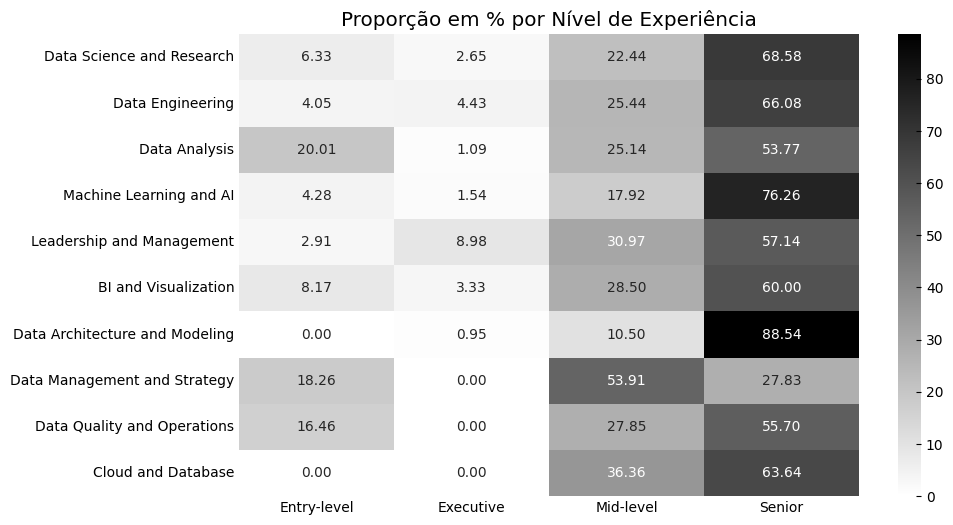

In [92]:
# Definindo o tamanho da imagem
plt.figure(figsize=(10, 6))
plt.title('Proporção em % por Nível de Experiência')

# Visualizando o DataFrame em um Heatmap
ax = sns.heatmap(data=categoria_exp, annot=True, fmt='.2f', cmap='binary')
ax.set_xlabel("") # Removendo a descrição dos eixos X e Y
ax.set_ylabel("")

# Ajustando fundo e linhas de grade
ax.set_facecolor('none')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Removendo os spines
for spine in ax.spines.values():
    spine.set_visible(False)

ax.grid(False)

In [93]:
tb_salario_categoria = df.groupby(['job_category'])\
                            .agg(min=pd.NamedAgg('salary_in_usd', 'min'),
                                max=pd.NamedAgg('salary_in_usd', 'max'),
                                mean=pd.NamedAgg('salary_in_usd', 'mean'))\
                            .reset_index()

tb_salario_categoria.dropna(axis=0, inplace=True)

tb_salario_categoria = tb_salario_categoria.rename(columns={'job_category': 'Categoria',
                                                            'min': 'Menor Salário',
                                                            'max': 'Maior Salário',
                                                            'mean': 'Média Salarial'})

- DataFrame Formato Largo (Wide Format)

In [94]:
# Centralizando a visualização da tabela
tb_salario_categoria.style.set_properties(**{'text-align': 'center'})

,Categoria,Menor Salário,Maior Salário,Média Salarial
0,BI and Visualization,15000,263000,125803.150000
1,Cloud and Database,82000,190000,142818.181818
2,Data Analysis,15000,430967,106742.485027
3,Data Architecture and Modeling,39245,381500,156159.405728
4,Data Engineering,17598,385000,146720.425721
5,Data Management and Strategy,41750,250000,93533.686957
6,Data Quality and Operations,23753,289120,96294.367089
7,Data Science and Research,16000,450000,162471.364064
8,Leadership and Management,20000,430640,142644.457649
9,Machine Learning and AI,15000,448000,181873.419926


- DataFrame Formato Longo (Long Format)

In [95]:
tb_salario_categoria = tb_salario_categoria.melt(id_vars="Categoria", 
                                                value_vars=["Menor Salário", "Maior Salário", "Média Salarial"], 
                                                var_name="Tipo de Salário", 
                                                value_name="Salário")

In [96]:
tb_salario_categoria.head(3)

,Categoria,Tipo de Salário,Salário
0,BI and Visualization,Menor Salário,15000.0
1,Cloud and Database,Menor Salário,82000.0
2,Data Analysis,Menor Salário,15000.0


In [97]:
tb_salario_categoria.sort_values(by='Salário', ascending=True, inplace=True)

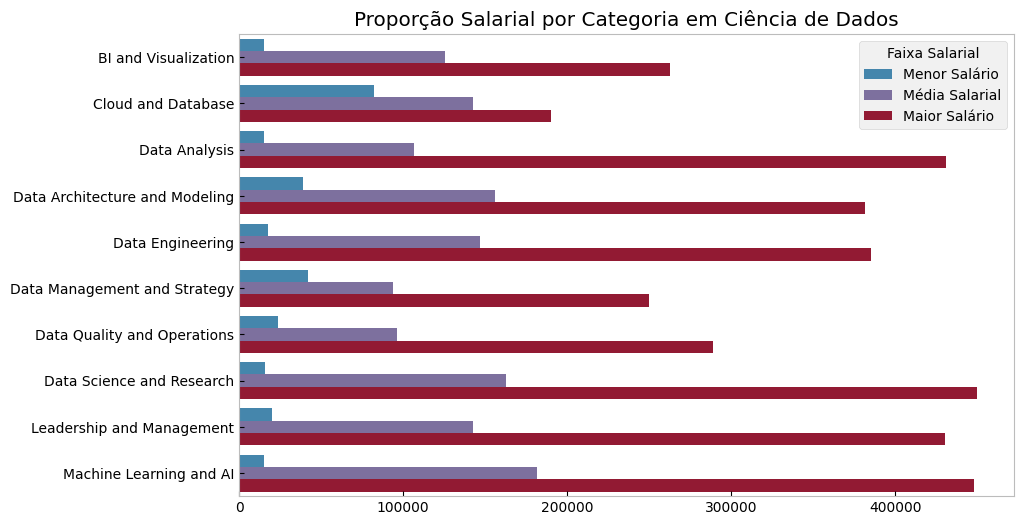

In [98]:
# Definindo o tamanho da imagem
plt.figure(figsize=(10, 6))

# Visualizando o DataFrame com Seaborn
ax = sns.barplot(data=tb_salario_categoria, y="Categoria", x="Salário", hue="Tipo de Salário", 
                palette={"Menor Salário": "C0", "Maior Salário": "C1", "Média Salarial": "C2"})

# Labels e título
plt.xlabel('Salário')
plt.ylabel('Categoria')
plt.title('Proporção Salarial por Categoria em Ciência de Dados')
plt.legend(title='Faixa Salarial')

ax.grid(False)
ax.set_facecolor('none')
ax.set_xlabel("") # Removendo a descrição dos eixos X e Y
ax.set_ylabel("")

plt.show()